In [1]:
#dataset
#A
a = [0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]
#B
b = [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]
#C
c = [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]

In [2]:
#creating labels
y = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

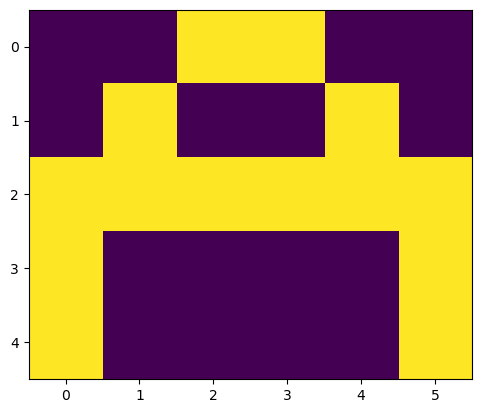

In [4]:
#visualize the data
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [5]:
#Convert data and lables into numpy array
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
#input layer
#hidden layer
#output layer

In [7]:
#activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [8]:
#Creating a feed forward netural network
def f_forward(x, w1, w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return (a2)

In [9]:
# initialize weights 
def generate_wt(x, y):
    l = []
    for i in range (x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x, y))

In [10]:
#loss computation 
def loss(out, y):
    s = (np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)

In [11]:
#back propagation
def back_prop(x, y, w1, w2, alpha):

    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1_term = (w2.dot(d2.T)).T  # shape: (batch_size, hidden_size)
    d1 = np.multiply(d1_term, a1 * (1 - a1))  # element-wise multiplication

    # Gradient computation
    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    w1 = w1 - (alpha*(w1_adj))
    w2 = w2 - (alpha*(w2_adj))

    return (w1,w2)
    

In [12]:
# train the dataset

def train(x, y, w1, w2, alpha= 0.01, epoch= 10):
    acc= []
    losss= []

    for j in range(epoch):
        l= []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epochs:", j+1, "acc:", (1-sum(l)/len(x))*100)
        acc.append((1-sum(l)/len(x))*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2

In [13]:
# predicting the values
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])): 
        if(maxm < Out[0][i]):
            maxm= Out[0][i]
            k= i
    if(k == 0):
        print("Image is of letter A")
    elif(k == 1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [14]:
w1= generate_wt(30, 5)
w2= generate_wt(5, 3)

print(w1, "\n\n", w2)

[[-1.50881561e+00 -1.42151273e+00 -1.77532521e-01 -1.38099287e+00
   1.32398724e+00]
 [-4.23091905e-01 -5.24545686e-01  1.87408290e+00  1.10615195e+00
   1.18692327e+00]
 [ 1.76533993e-01  1.32996954e+00 -7.98444903e-01  2.71779759e-01
  -6.40196532e-01]
 [ 7.75132859e-01 -5.13113056e-01 -8.70712036e-01  1.79309175e+00
  -7.81530151e-01]
 [ 1.47831301e+00  7.76403278e-01  1.61063310e+00  2.44070225e+00
   7.82660084e-01]
 [-8.56838711e-01  1.00705409e+00 -9.94667282e-01  5.58126650e-01
   1.55948892e+00]
 [-9.65558193e-01 -7.71745741e-01 -2.74364209e-01  3.18380194e-01
   2.77598549e-01]
 [ 7.13988130e-01 -1.25658280e+00 -9.71094779e-01 -1.27382959e+00
  -1.00811818e-01]
 [ 1.37547075e-02  7.32845711e-01  1.63563125e+00 -6.33590634e-01
  -6.47108623e-01]
 [ 5.49720378e-01  8.18209167e-01 -3.96188798e-01 -3.88514605e-01
   1.29705286e+00]
 [-4.68589660e-01 -4.48457464e-01  1.58434707e+00  2.13550173e+00
  -1.16236463e-01]
 [ 7.33148815e-01 -1.62121042e+00  3.89879469e-01 -8.46712157e-02

In [15]:
acc, losss, w1, w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 57.63553516502395
Epochs: 2 acc: 61.76767533797267
Epochs: 3 acc: 65.32310399942499
Epochs: 4 acc: 68.26598743170074
Epochs: 5 acc: 70.63555877981199
Epochs: 6 acc: 72.53406841896994
Epochs: 7 acc: 74.07682541464875
Epochs: 8 acc: 75.36301523842441
Epochs: 9 acc: 76.46719173410355
Epochs: 10 acc: 77.4416100468392
Epochs: 11 acc: 78.32203915996327
Epochs: 12 acc: 79.13312606802711
Epochs: 13 acc: 79.89214922383225
Epochs: 14 acc: 80.61135504992633
Epochs: 15 acc: 81.29937714730166
Epochs: 16 acc: 81.96213531210844
Epochs: 17 acc: 82.60346049969426
Epochs: 18 acc: 83.22558617112168
Epochs: 19 acc: 83.82957726333366
Epochs: 20 acc: 84.41571811365345
Epochs: 21 acc: 84.98384794505486
Epochs: 22 acc: 85.53362202163932
Epochs: 23 acc: 86.06468679956166
Epochs: 24 acc: 86.57677644995624
Epochs: 25 acc: 87.06975213652308
Epochs: 26 acc: 87.54360820397203
Epochs: 27 acc: 87.99846372158649
Epochs: 28 acc: 88.43454970983706
Epochs: 29 acc: 88.85219609799582
Epochs: 30 acc: 89.25181

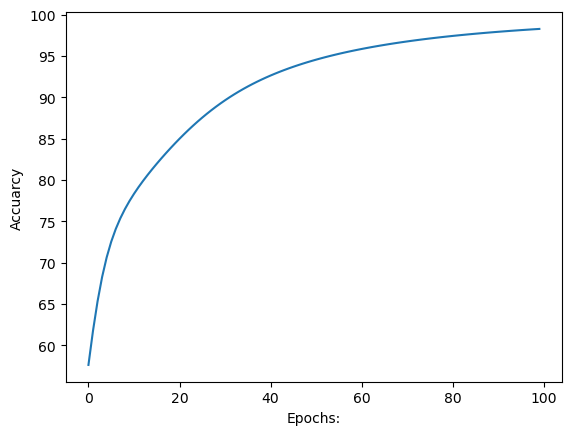

In [16]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel("Accuarcy")
plt.xlabel("Epochs:")
plt1.show()

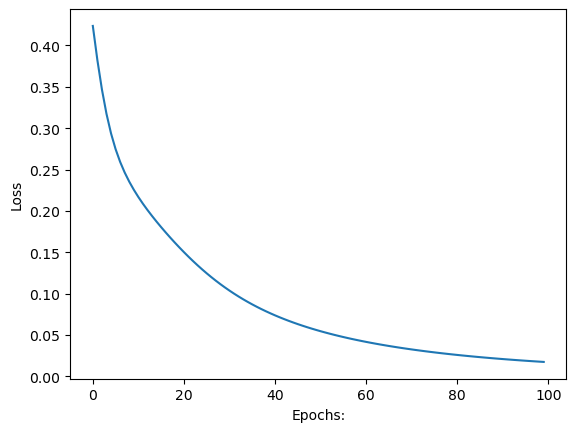

In [17]:
#plot loss
plt1.plot(losss)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt1.show()

In [18]:
print(w1, "\n\n", w2)

[[-1.50881561 -1.42151273 -0.17753252 -1.38099287  1.32398724]
 [-0.42683533 -0.29892111  1.89941603  0.72915253  1.3650375 ]
 [ 0.23038908  0.82988902 -0.79116876 -0.089865   -0.58732886]
 [ 0.82898794 -1.01319358 -0.8634359   1.43144699 -0.72866248]
 [ 1.47456959  1.00202785  1.63596624  2.06370282  0.96077431]
 [-0.85683871  1.00705409 -0.99466728  0.55812665  1.55948892]
 [-0.96555819 -0.77174574 -0.27436421  0.31838019  0.27759855]
 [ 0.76784321 -1.75666332 -0.96381864 -1.63547435 -0.04794415]
 [ 0.01375471  0.73284571  1.63563125 -0.63359063 -0.64710862]
 [ 0.54972038  0.81820917 -0.3961888  -0.3885146   1.29705286]
 [-0.41329388 -0.03043492  1.68568585  2.17635437 -1.28999966]
 [ 0.73314882 -1.62121042  0.38987947 -0.08467122 -1.09403315]
 [ 1.63408333  0.0048805  -2.45558505  0.19899318  0.42801547]
 [ 1.09601208 -0.76704765  0.14400369 -0.58374187  0.70990338]
 [-0.15607152  0.41887407  0.68982565  1.202765   -0.43196948]
 [-1.31460024  1.99989359 -1.17278239  1.5452489  -1.76

Image is of letter A


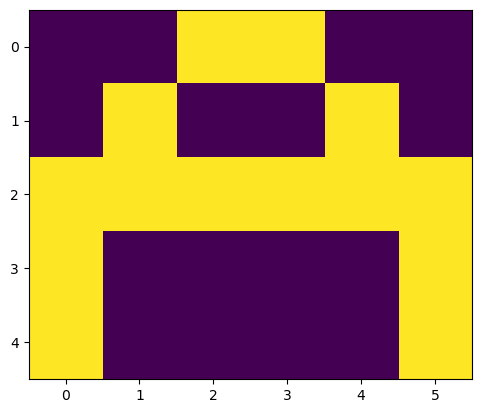

In [23]:
predict(x[0], w1, w2)